**Pyber Ride Sharing**

** Analysis **

* Observable Trend 1: Urban cities have the most drivers and rides
* Observable Trend 2: Rural cities have the least drivers and rides
* Observable Trend 3:Davidtown and South Bryanstad	( both Urban cities ) have the most drivers

** Dependencies **

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly.py
%matplotlib inline

**Read_CSV**

In [591]:
city_data = pd.read_csv('city_data.csv')
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [592]:
ride_data = pd.read_csv('ride_data.csv')
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [593]:
# observable trend, get the city with the most drivers
city_data.sort_values('driver_count', ascending=False ).head()

,city,driver_count,type
56,Davidtown,73,Urban
51,South Bryanstad,73,Urban
6,West Sydneyhaven,70,Urban
8,Torresshire,70,Urban
25,Williamshire,70,Urban


**Merge_DataFrames**

In [594]:
#merge both DataFrame
merge = pd.merge(city_data, ride_data, on = 'city')
merge.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


**Average_Fare_Per_City**

In [595]:
avg_fare = merge.groupby('city')['fare'].mean()
avg_fare.head()


city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

**Total_Number_Of_Rides_Per_City**

In [715]:
#Total Number of Rides Per City
#num_rides = merge.groupby('city').count()
num_rides = merge.groupby('city')['ride_id'].count()
pd.DataFrame(num_rides)

,ride_id
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19
Arnoldview,31
Campbellport,15
Carrollbury,10
Carrollfort,29


**Total_Number_Of_Drivers_Per_City**

In [739]:
#Total Number of Drivers Per City
num_drive = merge[ ['city','driver_count' ]].drop_duplicates()
num_drive

SyntaxError: invalid syntax (<ipython-input-739-c813ab3a8268>, line 2)

**City_Type**

In [699]:
#City Type (Urban, Suburban, Rural)
city_type = merge.groupby('type')
city_type.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
1625,Carrollbury,4,Suburban,2016-05-09 03:12:10,25.00,485795568537
1626,Carrollbury,4,Suburban,2016-06-09 05:04:24,49.47,617204620844
1627,Carrollbury,4,Suburban,2016-05-20 06:12:36,35.33,73368831241
1628,Carrollbury,4,Suburban,2016-03-21 17:31:26,20.26,7948046018548
1629,Carrollbury,4,Suburban,2016-08-20 11:20:51,46.67,4786094151694


**Bubble_Plot**

Text(0.5,1,'Pyber Ride Sharing Data (2016)')

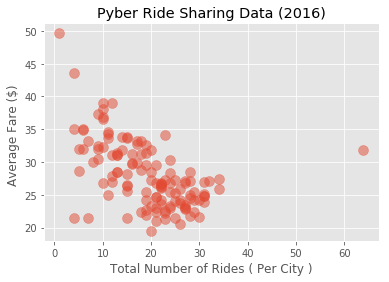

In [740]:
#plt.legend(['b', 'c', 'y','m','r'])
#colors=['b', 'c', 'y','m','r']
#oo = pd.DataFrame([b,a])
#x = oo.iloc[0]
#y = oo.iloc[1]

x = num_rides
y = avg_fare
z = num_drive
#plt.scatter(x,y, labels = 'Number of Rides', color = 'r')
plt.scatter(x, y, s=100, alpha=0.5 )
plt.xlabel('Total Number of Rides ( Per City )')
plt.ylabel('Average Fare ($) ')
plt.title('Pyber Ride Sharing Data (2016)')
#pd.DataFrame([ num_rides, avg_fare, num_drive ]).T

**Pie Chart**

** % of Total Fares by City Type ** 

In [600]:
# fare by city type 
fare = merge.groupby('type')['fare'].sum()
fare

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

In [601]:
#total fare
total_fare = fare[0] + fare[1] + fare[2]
total_fare

64669.119999999966

In [602]:
# pie chart labels
labels = [ fare.index[0], fare.index[1], fare.index[2] ]
labels


['Rural', 'Suburban', 'Urban']

In [603]:
# calculate percentages 
per_fare = [ ( fare[i]/ total_fare ) * 100 for i in range(3)]
per_fare

[6.5797864575859428, 31.445750305555404, 61.974463236858654]

Text(0.5,1,'% of Total Fares by City Type')

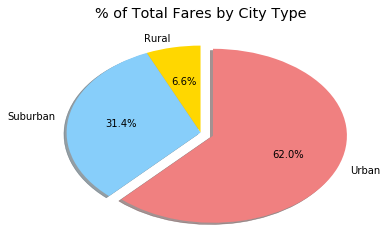

In [604]:
# plot the numbers
fig1, ax1 = plt.subplots()
colors = [ 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1 ) 
ax1.pie(per_fare, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90, colors=colors)
plt.title('% of Total Fares by City Type')

** % of Total Rides by City Type ** 

In [605]:
# get rides by city
rides = merge.groupby('type')['ride_id'].count()
rides

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [606]:
# total number of rides 
total_rides = rides[0] + rides[1] + rides[2]
total_rides

2407

In [607]:
# percentages
per_rides = [ ( rides[i]/ total_rides ) * 100 for i in range(3)]
per_rides

[5.1931865392604903, 27.295388450353137, 67.511425010386375]

Text(0.5,1,'% of Total Rides by City Type')

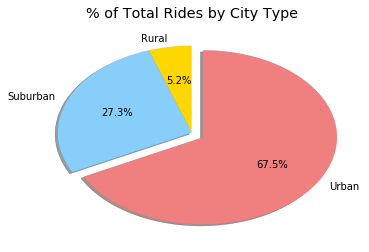

In [608]:
# plot
fig2, ax2 = plt.subplots()
ax2.pie(per_rides, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, explode=explode)
plt.title('% of Total Rides by City Type')

** % of Total Drivers by City Type **

In [609]:
# drivers by city type
drivers = merge.groupby('type')['driver_count'].sum()
drivers

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [610]:
# total number of drivers
total_drivers = drivers[0] + drivers[1] + drivers[2]
total_drivers

74958

In [611]:
# percentage
per_drivers = [ ( drivers[i]/ total_drivers ) * 100 for i in range(3)]
per_drivers

[0.96987646415325912, 12.980602470716935, 86.049521065129809]

Text(0.5,1,'% of Total Drivers by City Type')

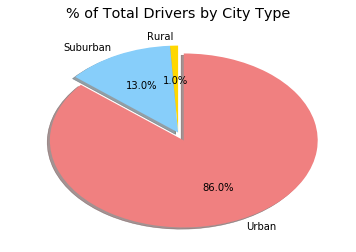

In [612]:
fig3, ax3 = plt.subplots()
ax3.pie(per_drivers, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, explode=explode)
plt.title('% of Total Drivers by City Type')